In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.linear_model import LinearRegression

In [2]:
df = pd.read_csv('calories.csv')

In [3]:
df = df.dropna(axis= 0 )

In [4]:
df.head()

,Duration,Pulse,Maxpulse,Calories
0,60.0,110,130,409.1
1,60.0,117,145,479.0
2,60.0,103,135,340.0
3,45.0,109,175,282.4
4,45.0,117,148,406.0


In [5]:
y = df.iloc[:,-1]

<Axes: >

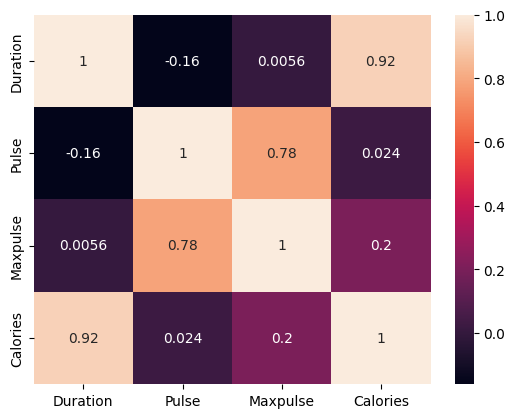

In [6]:
sns.heatmap(df.corr(),annot=True)

In [7]:
x = df['Duration']

In [8]:
x = pd.DataFrame(np.array(x).reshape(-1,1))

In [9]:
y

0      409.1
1      479.0
2      340.0
3      282.4
4      406.0
       ...  
164    290.8
165    300.0
166    310.2
167    320.4
168    330.4
Name: Calories, Length: 163, dtype: float64

In [10]:
from sklearn.model_selection import train_test_split

In [11]:
x_train,x_test,y_train,y_test = train_test_split(x,y,test_size= 0.2,random_state=42)

In [12]:
LR = LinearRegression()

In [13]:
LR.fit(x_train,y_train)

LinearRegression()

In [14]:
y_pred = LR.predict(x_test)

In [22]:
from sklearn.metrics import mean_absolute_error
from sklearn.metrics import root_mean_squared_error
from sklearn.metrics import r2_score

In [23]:
print("MAE",mean_absolute_error(y_test,y_pred))
print("RMSE",root_mean_squared_error(y_test,y_pred))
print("R2",r2_score(y_test,y_pred))

MAE 77.13815830562996
RMSE 137.59804446571323
R2 0.8378079275531995


<Axes: xlabel='0', ylabel='Calories'>

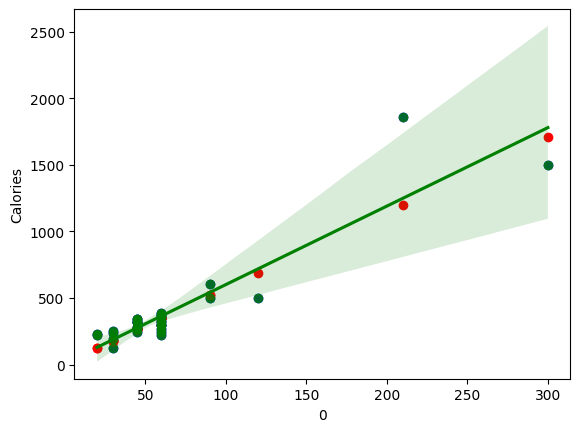

In [49]:
plt.scatter(x_test, y_test, c = 'b')
plt.scatter(x_test, y_pred, c = 'r')
sns.regplot(x = x_test, y = y_test, color = 'green')

In [51]:
LR.predict([[150]])

array([857.91902392])